# 🏅 **Análise e Limpeza de Dados - Olimpíadas** 🏅


**SUMÁRIO:**


1. Importação das bibliotecas;
2. Importação do dataset;
3. Observações iniciais;
4. Limpando dados;
5. Analisando dados;
6. Conclusão.

As informações do dataset podem ser vistas a seguir:

**INFORMAÇÕES DO DATASET:**
* **ID** - Um número de identificação único de cada atleta;
* **Name** - Nome do atleta;
* **Sex** - Gênero do atleta: M (masculino) ou F (feminino);
* **Age** - Idade; 
* **Height** - Altura em centímetros;
* **Weight** - Peso em kg;
* **Team** - Nome do time ao qual o atleta pertence;
* **NOC** - Nome do comitê olímpico nacional ao qual o atleta pertence, sempre será um código de 3 letras (BRA para Brasil, USA para Estados Unidos, etc.); 
* **Games** - Ano e época dos jogos; 
* **Year** - Ano da edição que o atleta participou;
* **Season** - Estação na qual ocorreu os jogos: Summer (verão) ou Winter (inverno);
* **City** - Cidade onde ocorreu a edição dos jogos;
* **Sport** - Esporte do atleta;
* **Event** - Especificação a respeito da categoria do esporte (Ex. Futebol masculino, vôlei feminino, corrida 500m, etc.);
* **Medal** - Medalha ganha pelo atleta: Gold (ouro), Silver (prata), Bronze, ou NA (nenhuma medalha).



# 1. Importação das bibliotecas


Antes de começarmos a trabalhar, precisamos importar as bibliotecas básicas e para visualização:

In [1]:
#operações básicas
import numpy as np
import pandas as pd

#para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importação do dataset

Em seguida, devemos importar o nosso dataset sobre as Olimpíadas:

In [2]:
df = pd.read_csv("df_athlete_events.csv") 

# 3. Observações iniciais

Para conhecermos um pouco o estilo do nosso dataset, podemos ver suas primeiras linhas:

In [3]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Também devemos ver como estão as informações ao longo do dataset, para termos uma noção inicial do que deverá ser tratado:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


Como observações iniciais temos que:


*   Existem 45567 entradas, mas, em algumas colunas, o número não é esse, o que retrata dados faltantes, portanto, deveremos trabalhar com eles;
*   Possuímos 11 colunas com dados categóricos e 4 com dados numéricos.



Para termos uma noção inicial sobre os dados categóricos, que possivelmente são mais fáceis de deduzirmos algo, devemos olhar as colunas em que esses dados aparecem. Vale ressaltar que os dados categóricos são descritos como 'object':

In [5]:
df.describe(include = "object")

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


Inicialmente, podemos perceber dois problemas mais facilmente:
* Existem 6 dados únicos na coluna "Sex", o que indica um problema, haja visto que deveriam ter duas classificações (isso de acordo com as informações providas do dataset);
* Existem 4 dados únicos na coluna "Medal", o que também indica um problema, já que existem apenas três tipos de medalha; portanto, a quarta classificação, que indica um não-medalhista, deve ser trabalhada.




# 4. Limpando dados

## 4.1 Retirando linhas duplicadas

A primeira análise que devemos ter ao olhar o dataset é vermos se ele possui linhas duplicadas:

In [6]:
df[df.duplicated()]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3608,12115,Gaston Frdric Blanchy,M,31.0,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
6130,19874,Jean-Baptiste tienne August Charcot,M,23.0,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
9239,29661,Jacques Doucet,M,NaN,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
10521,33564,William Edgar Exshaw,M,34.0,NaN,NaN,Olle,GBR,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
13044,40973,Victor Auguste Godinet,M,47.0,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
22419,67525,Jacques le Lavasseur,M,NaN,NaN,NaN,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
23432,70374,Robert Linzeler,M,28.0,NaN,NaN,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
25876,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
25877,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
26411,79304,Mathias Joseph Ferdinand Jules Henri Mialaret,M,44.0,NaN,NaN,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver


Após verificarmos a veracidade disso, podemos eliminá-las:

In [7]:
df.drop_duplicates(inplace = True)

## 4.2 Limpando a coluna 'Sex'


Podemos começar a limpeza pela coluna 'Sex', já que conseguimos prever seus erros anteriormente. Para isso, vamos verificar, primeiramente, os valores existentes na coluna:

In [8]:
print("Sex column unique values:")
print(pd.Series(df.Sex.unique()), end = "\n\n")

Sex column unique values:
0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object



Podemos perceber que há uma diferenciação entre "M" e "MALE", o que também ocorre entre "F" e "FEMALE", mesmo que ambos indiquem a mesma definição. Também existem os valores que não se encaixam como sexo, como 'Vic vai te dar um socao' e 'P&D >> Comunidade'.

Vamos, primeiramente, trabalhar o primeiro problema, o qual, para resolvermos, devemos trocar os dados:

In [9]:
#Substitui MALE por M:
df["Sex"].replace("MALE", "M", inplace = True)
#Substitui FEMALE por F:
df["Sex"].replace("FEMALE", "F", inplace = True)

Agora podemos trabalhar o segundo problema. Para isso, podemos verificar, na coluna 'Events', se o atleta participou de uma competição masculina ou feminina, o que pode ser visto caso, em alguma parte do nome de 'Events', tenha 'Men' ou 'Women'. Após isso, podemos verificar também quais valores únicos ocorrem nessas situações:


In [10]:
#Procurando eventos que sejam masculinos:
masculine = df[df["Event"].str.contains("Men")]

masculine.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [11]:
#Procurando eventos femininos:
feminine = df[df["Event"].str.contains("Women")]

feminine.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
18,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
20,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,-134,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
22,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,-182,Summer,Atlanta,Football,Football Women's Football,Bronze
30,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
31,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,hsuahusahu,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


In [12]:
#Verificando valores da coluna de sexo para eventos femininos:
print("Women's event Sex column unique values:")
print(pd.Series(feminine.Sex.unique()), end = "\n\n")

#Verificando valores da coluna de sexo para eventos masculinos:
print("Men's event Sex column unique values:")
print(pd.Series(masculine.Sex.unique()), end = "\n\n")

Women's event Sex column unique values:
0                    F
1    P&D >> Comunidade
dtype: object

Men's event Sex column unique values:
0                          M
1    Vic vai te dar um socao
dtype: object



Podemos perceber que o valor 'P&D >> Comunidade' está atrelado ao sexo 'F', enquanto o valor 'Vic vai te dar um socao' está atrelado ao sexo 'M'. Feito isso, podemos alterar os valores na coluna 'Sex':

In [13]:
df["Sex"].replace("Vic vai te dar um socao", "M", inplace = True)
df["Sex"].replace("P&D >> Comunidade", "F", inplace = True)

## 4.3 Limpando a coluna 'Medal'

In [14]:
#Verificando os valores da coluna:
print("Medal column unique values:")
print(pd.Series(df.Medal.unique()), end = "\n\n") 

Medal column unique values:
0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object



In [15]:
#Verificando a ocorrência dos valores:
df["Medal"].value_counts()

Gold      13317
Bronze    13255
Silver    13055
Nelson      166
Name: Medal, dtype: int64

Um valor discrepante é "Nelson", mas, como existem poucas ocorrências de 'Nelson', não será um problema tão relevante para a análise dos dados. Portanto, poderemos substituir o valor pela moda:

In [16]:
df["Medal"].replace("Nelson", df["Medal"].mode()[0], inplace = True)

Ainda assim, temos os NaN, que devem representar os que não ganharam medalha, portanto, atribuiremos 'NA' a eles para representarmos isso:

In [17]:
df.fillna(value = {"Medal":"NA"}, inplace = True)

## 4.4 Limpando a coluna 'Weight'

Uma questão que pudemos perceber ao executarmos a "info" do dataset é que a coluna 'Weight' está classificada como 'object', mas deveria ser numérica, portanto, devemos alterá-la. Antes, devemos analisá-la para vermos se algum dado está errado, ou seja, se é alfabético, e, caso exista, vamos substituí-lo.

Da forma como o dataset está organizado, caso um atleta tenha múltiplas participações nas Olimpíadas, seu dados são colocados em linhas seguintes. Devido a isso, neste caso, é interessante que alteremos o valor indesejado por um valor próximo. Para isso, utilizaremos os seguintes passos:

*   Se a linha anterior se refere ao mesmo atleta, será repetido o peso;
*   Se a linha posterior se refere ao mesmo atleta, será repetido o peso;
*   Caso nenhuma das condições acima sejam satisfeitas, o peso a ser inserido será a moda, já que a média ainda não é possível ser feita devido à existência de 'NaN':


In [18]:
for i in df.index:
  if type(df["Weight"][i]) is not float: #Ignorando os 'Nan'
    if df["Weight"][i].isalpha(): #Verificando se o valor é alfabético
      if df["Name"][i] == df["Name"][i-1]: #Se o atleta for o mesmo da linha anterior
        df["Weight"] = df["Weight"].replace(df["Weight"][i], method = "ffill")
      elif df["Name"][i] == df["Name"][i+1]: #Se o atleta for o mesmo da linha posterior
        df["Weight"] = df["Weight"].replace(df["Weight"][i], method = "bfill")
      else: 
        df["Weight"].replace(df["Weight"][i], df["Weight"].mode()[0], inplace = True)     

Mesmo assim, os números ainda estão classificados como string, e devemos alterá-los para valores numéricos:

In [ ]:
#Transformando números classificados como string em valores numéricos
for i in df.index:
  if type(df["Weight"][i]) is str: 
    df["Weight"][i] = float(df["Weight"][i])

Ainda devemos alterar os Nan. Para isso, utilizaremos um código similar ao utilizado duas células acima, só que, caso nenhuma condição seja satisfeita, utilizaremos, neste caso, a média:

In [20]:
for i in df.index:
  if np.isnan(df['Weight'][i]):
    if i != 0: #O primeiro índice se encaixa no "else", mas ele causa problema na leitura do "if", por isso a exceção
          if df["Name"][i] == df["Name"][i-1]: 
            df["Weight"] = df["Weight"].replace(df["Weight"][i], method = "ffill")
          elif df["Name"][i] == df["Name"][i+1]: 
            df["Weight"] = df["Weight"].replace(df["Weight"][i], method = "bfill")
          else: 
            df["Weight"].replace(df["Weight"][i], df["Weight"].mean()[0], inplace = True)      

Mesmo assim, alguns valores são um pouco discrepantes, como valores para peso menores do que 40kg. Sendo assim, alteraremos eles para a média:

In [21]:
df["Weight"].mask(df["Weight"] < 40, df["Weight"].mean(), inplace = True)

Por fim, para que os valores fiquem menos quebrados, tranformaremos o tipo da coluna para inteiro:

In [22]:
df["Weight"] = df["Weight"].astype("int64") 

## 4.5 Limpando a coluna 'Season'

In [23]:
df["Season"].value_counts() #Contando os valores que aparecem na coluna

Summer            38594
Winter             6808
#ForaBolsonaro       72
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

Como temos valores estranhos, devemos limpá-los. Para isso, podemos utilizar como apoio a coluna 'Games', já que seus valores informam, também, a temporada. Vamos, primeiramente, visualizar isso:

In [24]:
df[df["Games"].str.contains("Summer")].head() #Verificando jogos de verão

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,75,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,85,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,85,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [25]:
df[df["Games"].str.contains("Winter")].head() #Verificando jogos de inverno

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,6,Per Knut Aaland,M,31.0,188.0,75,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NA
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
10,20,Kjetil Andr Aamodt,M,20.0,176.0,85,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
11,20,Kjetil Andr Aamodt,M,20.0,176.0,85,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
12,20,Kjetil Andr Aamodt,M,22.0,176.0,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver


Agora podemos alterar os resultados da coluna 'Season':

In [ ]:
for i in df.index:
  if "Summer" in df["Games"][i]: #Escolhendo jogos de verão
    df["Season"][i] = "Summer"
  elif "Winter" in df["Games"][i]: #Escolhendo jogos de inverno
    df["Season"][i] = "Winter"

## 4.6 Limpando a coluna 'Year'

In [27]:
df["Year"].unique() #Verificando os valores únicos da coluna

array([ 1900,  1992,  1920,  2014,  1948,  1952,  1994,  2002,  2006,
        2008,  -134,  -765,  -182,  1960,  1912,  1956,  2016,  2000,
        2012,  1996,  2004,  1980,  1984,  1936,  1988,  1906,  1964,
        1972,  1924,  1904,  1932,  1928,  1998,  1968,  1976,  2010,
        1908, -1421, -1246, -2992,  -670,  -248,  -825, -2378, -1143,
        -164, -2813,  -181,  -783,  1896, -2491, -1084, -2743, -1190,
       -1114, -1348,  -950, -1243, -2023,  -915, -1224, -2124,  -823,
       -2457, -2793])

Para limparmos a coluna 'Year', também utilizamos como base a coluna 'Games'. Para isso, podemos, primeiramente, duplicar os valores da coluna 'Games' na coluna 'Year':

In [28]:
df["Year"] = df["Games"]

Agora, iremos retirar as partes 'Summer' e 'Winter' na coluna 'Year':

In [29]:
df["Year"] = df["Year"].str.replace("Summer","")
df["Year"] = df["Year"].str.replace("Winter","")

Agora, podemos converter o tipo da coluna, que é 'object', para 'int64':

In [30]:
df["Year"] = df["Year"].astype("int64")

## 4.7 Limpando a coluna 'City'

In [31]:
df["City"].value_counts() #Verificando os valores da coluna

London                    4091
Athina                    2886
Los Angeles               2377
Beijing                   2310
Rio de Janeiro            2301
Sydney                    2267
Atlanta                   2124
Barcelona                 1983
Seoul                     1839
Paris                     1578
Montreal                  1522
Moskva                    1521
Munich                    1407
Antwerpen                 1376
Mexico City               1242
Tokyo                     1198
Roma                      1076
Helsinki                  1074
Stockholm                 1070
Berlin                    1036
Melbourne                  963
Amsterdam                  849
Sochi                      709
Torino                     624
Vancouver                  622
Salt Lake City             563
Nagano                     521
St. Louis                  518
Innsbruck                  497
Lillehammer                412
Albertville                403
Lake Placid                351
Calgary 

Podemos perceber que há um valor estranho, '######'.  Para essa limpeza, podemos alterá-lo pela moda:


In [32]:
df["City"].replace("######", df["City"].mode()[0], inplace = True)

## 4.8 Limpando a coluna 'Age'

In [33]:
df["Age"].unique() #Verificando os valores da coluna

array([34., 31., 30., 28., 32., 20., 22., 27., 24., 26., 23., 25., 21.,
       38., 29., 33., nan, 41., 35., 19., 36., 15., 17., 16., 18., 43.,
       37., 45., 39., 53., 47., 44., 49., 40., 52., 14., 54., 48., 46.,
       56., 42., 58., 13., 70., 60., 50., 51., 62., 57., 61., 66., 55.,
       65., 73., 12., 72., 68., 59., 11., 69., 63., 64., 10., 71.])

Primeiramente, vamos verificar a quantidade das ocorrências de 'Nan':

In [34]:
df["Age"].isnull().sum()

969

Agora, como vimos que ele não corresponde a parte grande dos dados, podemos alterá-lo pela média. Em seguida, transformaremos o tipo da coluna para inteiro, para que os valores não fiquem quebrados:

In [35]:
df.fillna(value = {"Age": df["Age"].mean()}, inplace = True) #Alteração dos 'NaN'

In [36]:
df["Age"] = df["Age"].astype("int64") #Transformando o tipo da coluna

## 4.9 Limpando a coluna 'Team'

In [37]:
df["Team"].unique() #Verificando os valores da coluna

array(['Denmark/Sweden', 'United States', 'Finland', 'Norway',
       'Netherlands', 'Taifun', 'France', 'Italy', 'Spain', 'Azerbaijan',
       'Russia', 'Argentina', 'Belarus', 'Cameroon', 'Hungary',
       'Thessalonki-1', 'Australia', 'Egypt', 'Iran', 'Canada',
       'Pakistan', 'Soviet Union', 'Uzbekistan', 'Tajikistan',
       'Unified Team', 'Japan', 'Ethiopia', 'Switzerland', 'East Germany',
       'Germany', 'Monaco', 'Fornebo', 'Vesper Boat Club', 'Sweden',
       'South Africa', 'Turkey', 'Bulgaria', 'Great Britain', 'Poland',
       'Djibouti', 'Jordan', 'Romania', 'Cuba', 'Puerto Rico',
       'Venezuela', 'Mexico', 'Ghana', 'Morocco', 'New Zealand',
       'Switzerland-1', 'Switzerland-2', 'Uruguay', 'Denmark',
       'Czechoslovakia', 'Nigeria', 'Kenya', 'Brazil', 'France-1',
       'Germany-2', 'Austria', 'Lithuania', 'Belgium', 'Stella-2',
       'United States-1', 'West Germany',
       'Large boat, Central Naval Prep School "Poros"-1', 'Benin',
       'Panama', 'El S

Percebemos que alguns valores são indesejados para a coluna, como '#ForaBolsonaro', então devemos alterá-los. Para isso, utilizaremos o código semelhante ao cuja função era limpar a coluna "Weight":




In [38]:
for i in df.index:
  if i != 0:
    if df["Team"][i] == "#ForaBolsonaro":
      if df["Name"][i] == df["Name"][i-1]: 
        df["Team"] = df["Team"].replace("#ForaBolsonaro", method = "ffill")
      elif df["Name"][i] == df["Name"][i+1]:
        df["Team"] = df["Team"].replace("#ForaBolsonaro", method = "bfill")
      else: 
        df["Team"] = df["Team"].replace("#ForaBolsonaro", df["Team"].mode()[0])       

## 4.10 Limpando a coluna 'Height'

In [39]:
df["Height"].isnull().sum() #Verificando as ocorrências de Nan

10007

In [40]:
df["Height"].unique() #Verificando os valores que aparecem na coluna

array([         nan, 1.880000e+02, 1.840000e+02, 1.750000e+02,
       1.760000e+02, 1.630000e+02, 1.890000e+02, 1.820000e+02,
       1.980000e+02, 1.940000e+02, 1.650000e+02, 1.790000e+02,
       1.780000e+02, 1.800000e+02, 1.850000e+02, 1.860000e+02,
       1.810000e+02, 1.900000e+02, 1.870000e+02, 1.910000e+02,
       1.700000e+02, 1.730000e+02, 1.690000e+02, 1.600000e+02,
       1.670000e+02, 2.020000e+02, 1.770000e+02, 1.796909e+06,
       5.977400e+05, 5.134640e+05, 1.660000e+02, 1.590000e+02,
       1.720000e+02, 1.680000e+02, 1.610000e+02, 1.970000e+02,
       1.920000e+02, 1.830000e+02, 1.710000e+02, 1.480000e+02,
       1.500000e+02, 1.580000e+02, 1.740000e+02, 1.436796e+06,
       1.156881e+06, 1.976779e+06, 2.000000e+02, 1.620000e+02,
       1.640000e+02, 1.930000e+02, 1.470000e+02, 1.960000e+02,
       1.950000e+02, 1.540000e+02, 1.560000e+02, 2.010000e+02,
       1.320000e+02, 1.549598e+06, 2.331570e+05, 1.196132e+06,
       1.570000e+02, 2.070000e+02, 2.030000e+02, 1.5500

Percebemos, inicialmente, que alguns valores estão destoando e existem, também, 'NaN'. O ideal é que troquemos esse valores pela média, no entanto, se fizermos a média considerando os outliers, o valor não será propício. Devido a isso, começaremos tratando justamente os valores muito altos e vamos substituí-los pela moda, já que a média não será propícia devido ao alto valor destes números:

In [41]:
df["Height"].mask(df["Height"] > 250, df["Height"].mode(), inplace = True)

Agora, como só existem 'Nan' para tratarmos. Utilizaremos o nosso código que verifica as linhas anteriores e posteriores, caso contrário, será atribuída a média:





In [42]:
for i in df.index:
  if np.isnan(df['Height'][i]): #Verificando se o valor é Nan
    if i != 0:
      if df["Name"][i] == df["Name"][i-1]: 
        df["Height"] = df["Height"].replace(df["Height"][i], method = "ffill")
      elif df["Name"][i] == df["Name"][i+1]: 
        df["Height"] = df["Height"].replace(df["Height"][i], method = "bfill")
      else: 
        df["Height"].replace(df["Height"][i], df["Height"].mean()[0], inplace = True)     

Em seguida, é conveniente que alteremos o tipo da coluna para inteiro, a fim de que resultados não fiquem extremamente quebrados:

In [43]:
df["Height"] = df["Height"].astype("int64")

## 4.11 Verificando as demais colunas

Após limparmos essas colunas, algumas ainda restaram, então devemos observá-las para vermos se elas não precisam ser limpas também.
Para isso, pode ser utilizada a função "unique" para cada coluna. Aqui, mostraremos a info, para confirmarmos que os dados estão limpos:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45554 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Athlete_ID  45554 non-null  int64 
 1   Name        45554 non-null  object
 2   Sex         45554 non-null  object
 3   Age         45554 non-null  int64 
 4   Height      45554 non-null  int64 
 5   Weight      45554 non-null  int64 
 6   Team        45554 non-null  object
 7   NOC         45554 non-null  object
 8   Games       45554 non-null  object
 9   Year        45554 non-null  int64 
 10  Season      45554 non-null  object
 11  City        45554 non-null  object
 12  Sport       45554 non-null  object
 13  Event       45554 non-null  object
 14  Medal       45554 non-null  object
dtypes: int64(5), object(10)
memory usage: 6.8+ MB


Como previsto, a limpeza do dataset está completa. Agora, partiremos para a análise dos dados.

# 5. Analisando dados

## Adotando definições iniciais

Antes de começarmos a trabalhar com os gráficos, é interessante que façamos algumas definições para que as análises fiquem mais claras e fáceis. Vale ressaltar que as análises se baseiam apenas nos medalhistas do dataset:

In [45]:
#Definindo um filtro para não aparecerem os atletas que não ganharam medalha, já que as análises devem ser feitas em cima dos medalhistas:
medals = df[df["Medal"] != "NA"]

#Definindo as cores das medalhas:
medals_colors = {"Gold": "#FFD700", "Silver": "#C0C0C0", "Bronze": "#CD7F32"}

#Definindo a ordem das medalhas:
medals_order = ["Gold","Silver","Bronze"]

#Definindo a nossa palheta de cores:
sns.set_palette("gist_rainbow")

#Definindo o nosso estilo para o fundo dos gráficos:
sns.set_style("darkgrid")

## 5.1 Relação entre sexo e medalhistas

Como uma primeira análise do dataset, podemos organizar os atletas de acordo com o sexo. Vale ressaltar que, como vários atletas aparecem em múltiplas linhas, para essa análise, as repetições devem ser desconsideradas:

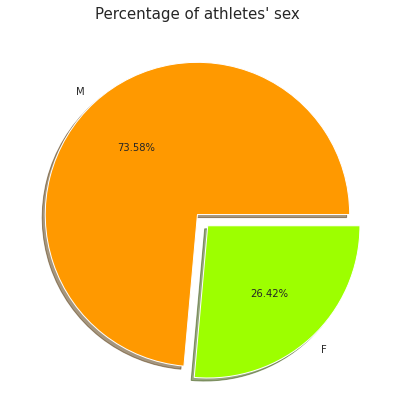

In [46]:
labels = medals.drop_duplicates(subset = "Name")["Sex"].value_counts().index
sizes = medals.drop_duplicates(subset = "Name")["Sex"].value_counts().values
explode = [0,0.1]

plt.figure(figsize = (7,7))
plt.pie(sizes, labels = labels, explode = explode, shadow = True, autopct = "%1.2f%%")
plt.title("Percentage of athletes' sex", fontsize = 15)
plt.show()

Percebemos, então, que a quantidade de dados relativos ao sexo masculino é próximo ao triplo de dados relativos ao sexo feminino. Para entendermos um pouco mais sobre a situação, podemos visualizar um gráfico que mostre a distribuição de atletas por sexo ao longo do tempo:

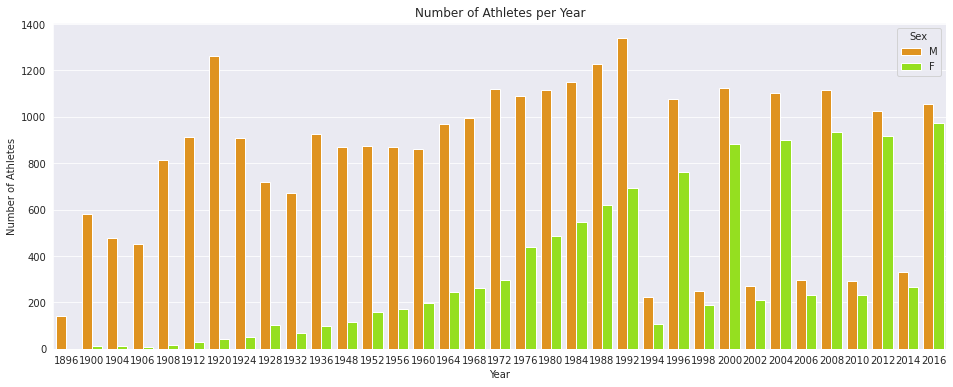

In [47]:
plt.figure(figsize = (16,6))
sns.countplot(x = "Year", data = medals, hue = 'Sex')
plt.ylabel("Number of Athletes")
plt.xlabel("Year")
plt.title("Number of Athletes per Year")
plt.show()

Percebemos, então, que a quantidade de mulheres nas Olimpíadas é pequena porque só começaram a participar dos eventos em quantidade relevante em um tempo mais recente; nos dados da última Olimpíada do dataset, em 2016, o número de atletas mulheres ficou bem próximo ao de atletas homens. 

Vale ressaltar que o eixo horizontal, representando os anos, apresenta alguns saltos, já que os Jogos Olímpicos ocorrem a cada 2 anos. Também podemos ver a inexistência de dados em 1940 e em 1944, anos em que o evento deveria ocorrer, mas não aconteceu devido à Segunda Guerra Mundial.

Outra situação interessante de se ver é que, em 1994, ocorre uma diminuição drástica do número de medalhistas, o que reflete que, a partir desse ano, Jogos de Inverno passaram a ser realizados em anos diferentes dos Jogos de Verão, o que reflete a interpolação entre números altos e baixos de medalhistas nas edições sequentes. 

## 5.2 Relação entre medalhistas e temporadas

Podemos, então, ver como os atletas são distribuídos nas edições das Olimpíadas de acordo com a temporada em que ocorre:

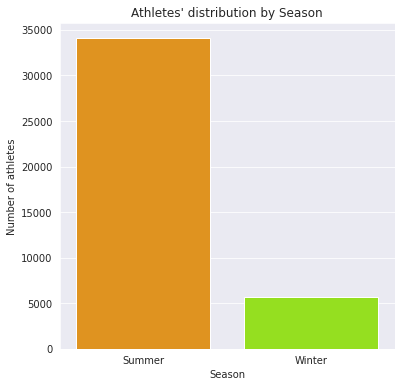

In [48]:
plt.figure(figsize = (6,6))
sns.countplot(x = "Season", data = medals)
plt.xlabel("Season")
plt.ylabel("Number of athletes")
plt.title("Athletes' distribution by Season")
plt.show()

Percebemos, então, que há uma concentração de medalhistas e, consequentemente, de participantes, nas modalidades esportivas de verão. Para isso, uma hipótese que podemos definir é que, nessa temporada, é ofertada uma maior diversidade de competições, o que podemos verificar se é verossímil ou não: 

In [49]:
lista_verao = [] #Definindo uma lista inicial para colocarmos os esportes de verão
lista_inverno = [] #O mesmo, só que para esportes de inverno
for i in medals.index:
  if medals["Season"][i] == "Summer": #Escolhendo esportes de verão e adicionando à lista
    lista_verao.append(medals["Sport"][i])
  elif medals["Season"][i] == "Winter": #Escolhendo esportes de inverno e adicionando à lista
    lista_inverno.append(medals["Sport"][i])

a = len(set(lista_inverno)) #Contando quantos esportes de invernos únicos ocorrem
b = len(set(lista_verao)) #Contando quantos esportes de verão únicos ocorrem

print(f"Ocorrem {a} esportes variados no inverno, enquanto ocorrem {b} esportes variados no verão.")

Ocorrem 17 esportes variados no inverno, enquanto ocorrem 52 esportes variados no verão.


Portando, a nossa hipótese é confirmada, haja visto que ocorrem mais esportes variados nas edições de verão.

Outro fator que podemos ver é em qual temporada ocorreram primeiro os Jogos Olímpicos:

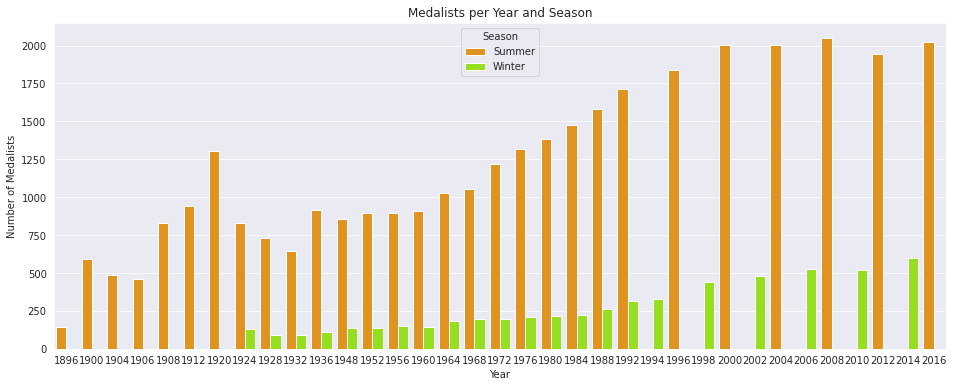

In [50]:
plt.figure(figsize = (16,6))
sns.countplot(x = "Year", data = medals, hue = "Season")
plt.ylabel("Number of Medalists")
plt.xlabel("Year")
plt.title("Medalists per Year and Season")
plt.show()

Podemos então concluir que outro fator que influencia a concentração de atletas nos Jogos de Verão é que, nessa temporada, jogos começaram a ser disputados em 1896, enquanto, no Inverno, só em 1924.

## 5.3 Relação entre idade, atletas e medalhas

Outra questão interessante de ser analisada é se a idade de um atleta o influencia a receber uma medalha, o que podemos ver no gráfico a seguir:

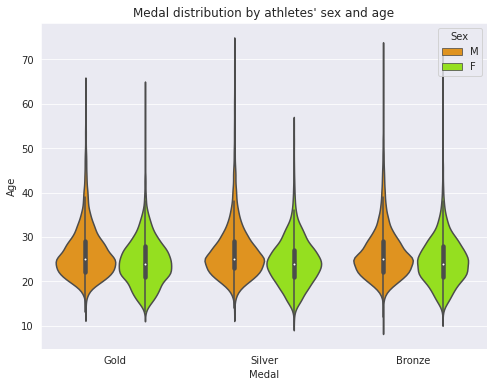

In [51]:
plt.figure(figsize = (8,6))
sns.violinplot(x = "Medal", y = "Age", hue = "Sex", data = medals, order = medals_order)
plt.xlabel("Medal")
plt.ylabel("Age")
plt.title("Medal distribution by athletes' sex and age")
plt.show()

Percebemos que há uma concentração maior de medalhistas na faixa entre 20 e 30 anos; para vermos exatamente suas ocorrências, podemos olhar o gráfico abaixo: 

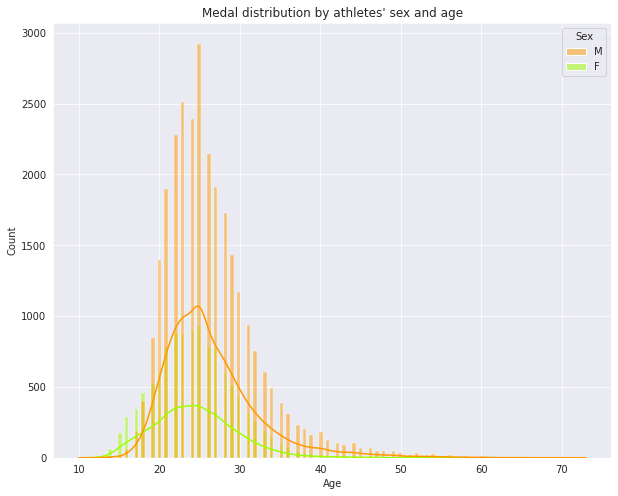

In [52]:
plt.figure(figsize = (10,8))
sns.histplot(data = medals, x = "Age", hue = "Sex", kde = True)
plt.title("Medal distribution by athletes' sex and age")
plt.show()

Além disso, podemos perceber, no nosso "violinplot", que os medalhistas mais velhos são do sexo masculino. Essa constatação pode ser vista mais claramente no gráfico a seguir:

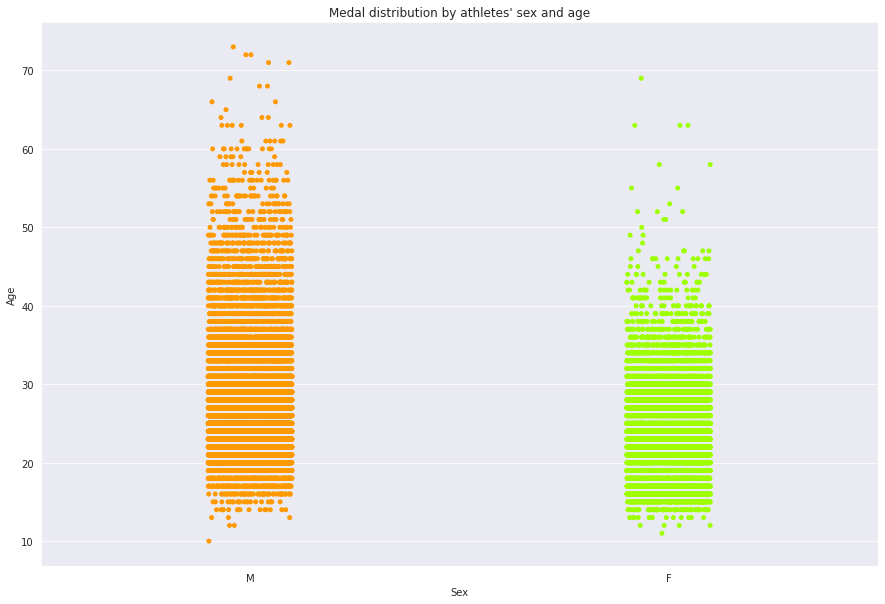

In [53]:
plt.figure(figsize = (15,10))
sns.stripplot(x = "Sex", y = "Age", data = medals)
plt.title("Medal distribution by athletes' sex and age")
plt.show()

Em relação à distribuição das idades, podemos montar um "boxplot", que pode nos informar a existência de outliers, valores que tem seus valores discrepantes quando comparados aos mais recorrentes. Vale ressaltar que, como os dados já estão limpos, não queremos excluí-los, apenas retirar análises dos dados:

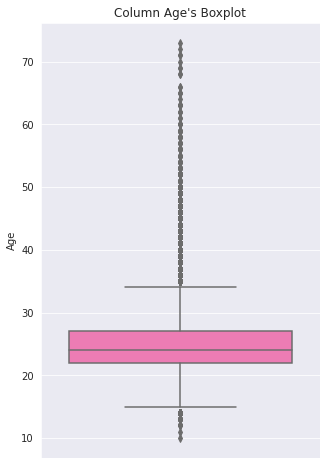

In [54]:
#Definindo os atletas sem repetição:
athletes = df.drop_duplicates(subset = ["Name"])

plt.figure(figsize = (5,8))
sns.boxplot(y = "Age", data = athletes, color = "hotpink")
plt.title("Column Age's Boxplot")
plt.show()

Assim como analisamos previamente, a maior concentração de atletas é entre 20 e 30 anos; o boxplot restringe ainda mais esta faixa etária.
Mesmo assim, podemos perceber que existem atletas com idade muito inferior ou superior a essa faixa.

Ainda em relação à idade dos atletas, podemos analisar como a faixa etária de maior concentração foi alterada ao longo dos anos, o que pode ser visto no gráfico a seguir:

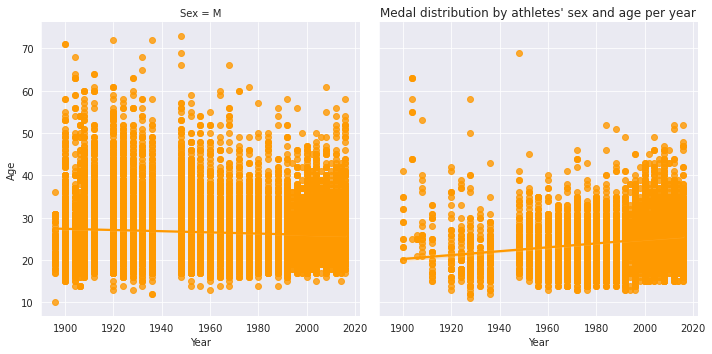

In [55]:
sns.lmplot(x = "Year", y = "Age", data = medals, col = "Sex")
plt.title("Medal distribution by athletes' sex and age per year")
plt.show()

Podemos perceber que a antiga dispersão de atletas masculinos por uma faixa etária mais abrangente, incluindo atletas entre 15 e 55 anos, convergiu para uma faixa etária mais restrita e num intervalo mais baixo em um tempo mais recente, com atletas entre 15 e 45 anos. 

No cenário feminino, a concentração da idade das mulheres sofreu efeito contrário ao masculino: enquanto, antigamente, as mulheres se concentravam em uma faixa etária de 15 a 30 anos, em um tempo recente, encontram-se mais concentradas entre 15 e 40 anos. Isso se deve ao avanço das conquistas femininas, inclusive no ambiente esportivo.


Podemos, então, analisar se sexo e ano também influenciam o tipo de medalha obtido pelo ou pela atleta:

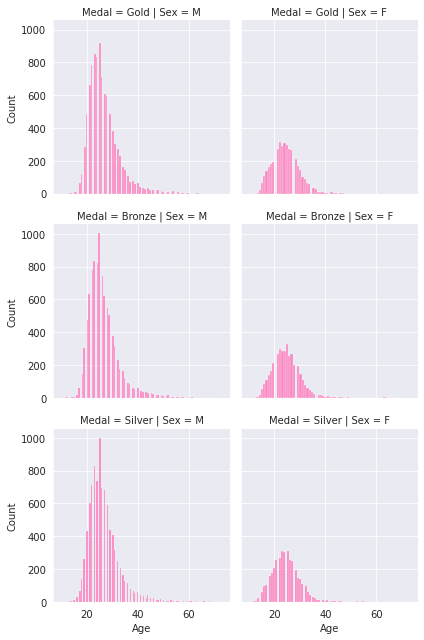

In [56]:
g = sns.FacetGrid(medals, col = "Sex", row = "Medal")
g.map(sns.histplot, "Age", color = "hotpink")
plt.show()

Como percebemos, independente do valor do minério, a distribuição das medalhas segue um padrão muito similar em todas as ocasiões para o mesmo gênero.

## 5.4 Relação entre altura, peso, idade e esportes

Uma análise que podemos fazer em um dataset diz respeito à correlação entre seus dados numéricos. No nosso dataset, não temos muitos dados numéricos, mas podemos ver se essa relação de implicação existe no chamado "heatmap":

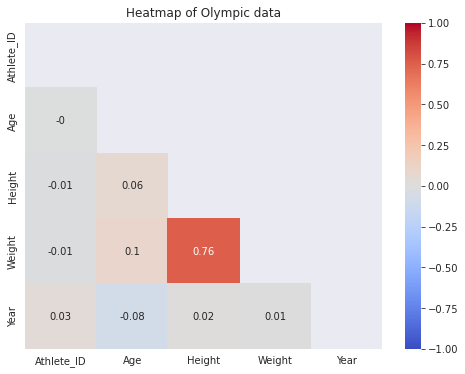

In [57]:
plt.figure(figsize=(8,6))

#O parâmetro mask faz com que o gráfico não fique espelhado, para facilitar a visualização:
corr = medals.corr()
mask = mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=1, vmin=-1, annot=np.round(corr.values, 2), cmap='coolwarm', mask=mask) 
plt.title("Heatmap of Olympic data")
plt.show()

Percebemos, então, que há uma correlação entre peso e altura. Uma explicação para isso deve-se ao fato de que como o dataset apresenta medalhistas e, consequentemente, atletas, os valores em questão referem-se a pessoas que mantém um peso relativo à altura em uma faixa similar. 

Podemos ver essa correlação, então, isoladamente:

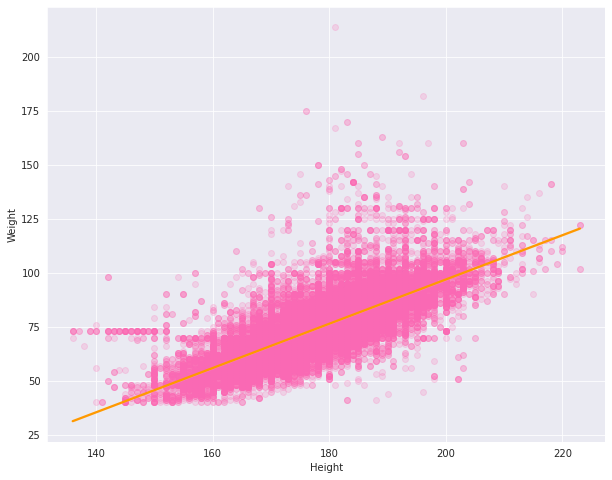

In [58]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'Height', y = 'Weight', data = medals, scatter_kws = {'alpha':0.2,'color':'hotpink'})
plt.show()

Também podemos trabalhar com os "boxplots" nas colunas de peso e altura para que vejamos os outliers. Novamente, ressaltamos que o intuito não é excluí-los, apenas inferir análises acerca de suas ocorrências.

Começaremos pelo "boxplot" da coluna de altura::

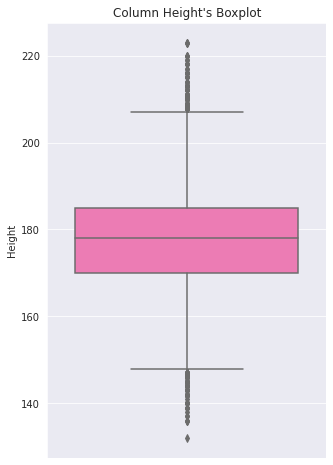

In [59]:
plt.figure(figsize = (5,8))
sns.boxplot(y = "Height", data = athletes, color = "hotpink")
plt.title("Column Height's Boxplot")
plt.show()

Podemos perceber que a maior concentração de altura dos atletas está entre 175 cm e 185 cm aproximadamente. Ainda assim, percebemos que há a existência de alturas muito menores ou maiores do que essa faixa.

Agora, montaremos o "boxplot" da coluna de peso:

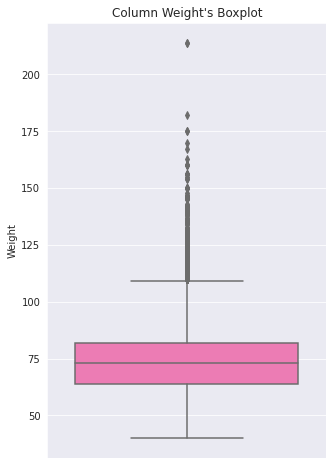

In [60]:
plt.figure(figsize = (5,8))
sns.boxplot(y = "Weight", data = athletes, color = "hotpink")
plt.title("Column Weight's Boxplot")
plt.show()

Percebemos que a maior concentração de peso dos atletas se mantém na faixa entre 65 e 80 kg, aproximadamente. Assim como nos outros boxplots, existem ocorrências prévias e posteriores a essa faixa.

Com base nos nossos dados, também podemos verificar se há alguma relação de altura ou peso para os medalhistas de cada esporte. Primeiramente, vamos verificar a altura:

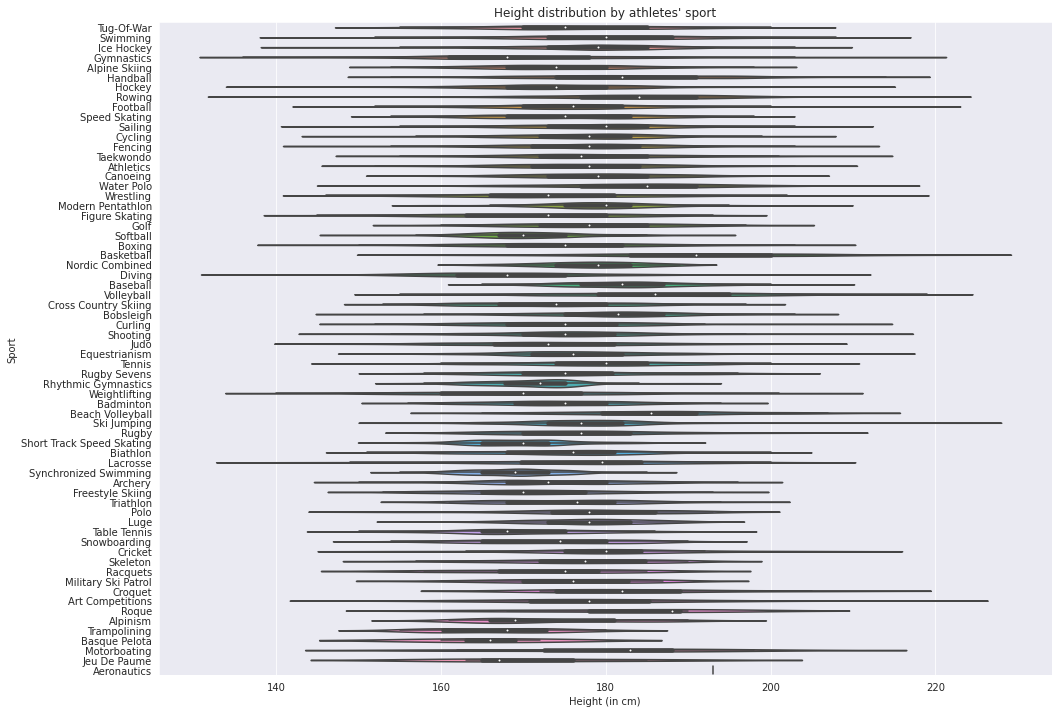

In [61]:
plt.figure(figsize = (16,12))
sns.violinplot(x = "Height", y = "Sport", data = medals)
plt.ylabel("Sport")
plt.xlabel("Height (in cm)")
plt.title("Height distribution by athletes' sport")
plt.show()

Após vermos o gráfico, podemos concluir que os esportes "Basketball" e "Volleyball" apresentam maior concentração de atletas em faixas de altura mais altas. Em seguida, podemos ver esse mesmo tipo de gráfico, mas, agora, em relação ao peso do atletas:

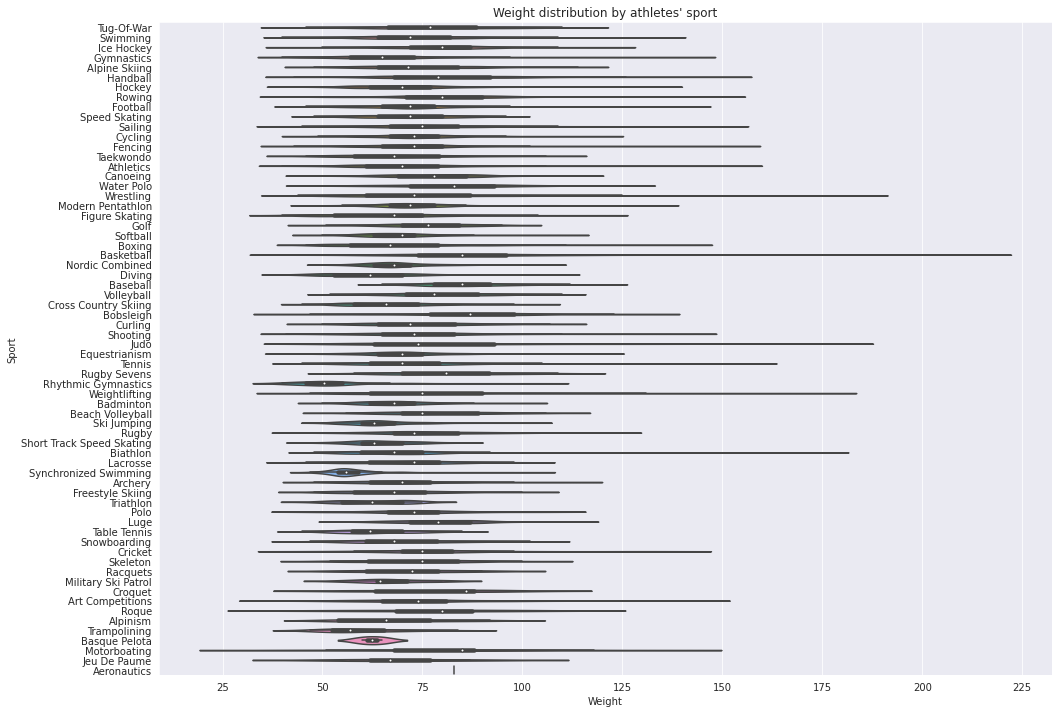

In [62]:
plt.figure(figsize = (16,12))
sns.violinplot(x = "Weight", y = "Sport", data = medals)
plt.ylabel("Sport")
plt.xlabel("Weight")
plt.title("Weight distribution by athletes' sport")
plt.show()

Com esse gráfico, percebemos que os esportes com concentração de atletas em faixas de peso mais altas são "Basketball" e "Bobsleigh"; no entanto, os que possuem os atletas mais pesados são "Basketball" e "Wrestling".


Além disso, ao olharmos esportes variados, podemos verificar se há uma diferença na idade média dos medalhistas de cada esporte, o que pode ser visto no gráfico a seguir:

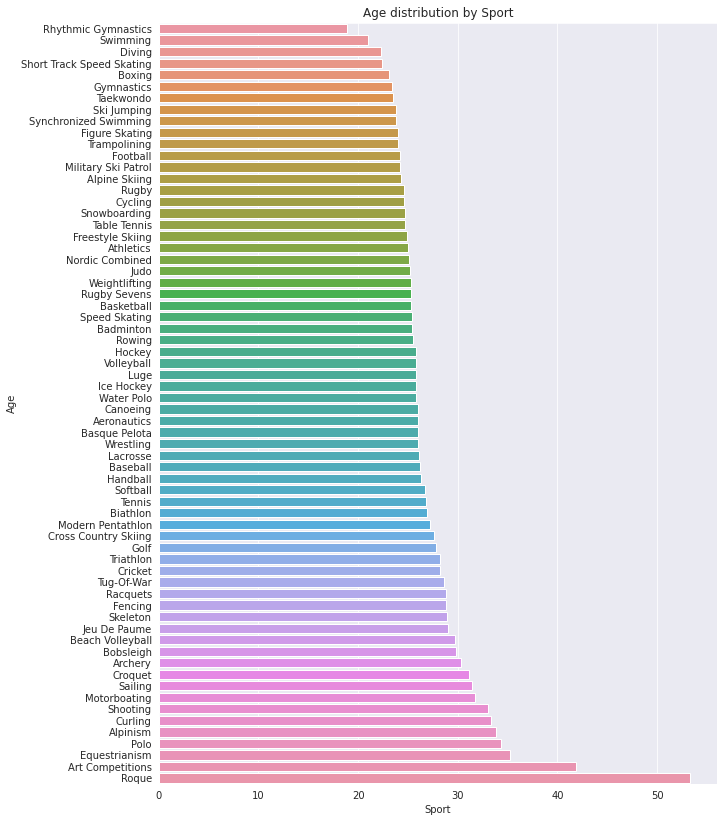

In [63]:
#Criando um dataset com as médias para cada esporte
sport_mean = medals.groupby(["Sport"], as_index = False).mean()

#Plotando o gráfico
plt.figure(figsize = (10,14))
sns.barplot(x = "Age", y = "Sport", data = sport_mean.sort_values("Age"))
plt.ylabel("Age")
plt.xlabel("Sport")
plt.title("Age distribution by Sport")
plt.show()

Com isso, podemos concluir que os medalhistas com idade média mais elevada praticam "Roque", enquanto os medalhistas faixa etária média menor praticam Ginástica Rítmica.

## 5.5 Relação entre país e medalhas

Outra questão que surge é: quais os países com maior quantidade de medalhas? 

Podemos responder essa pergunta por meio do gráfico a seguir, que apresenta os 30 países com mais medalhas do nosso dataset:

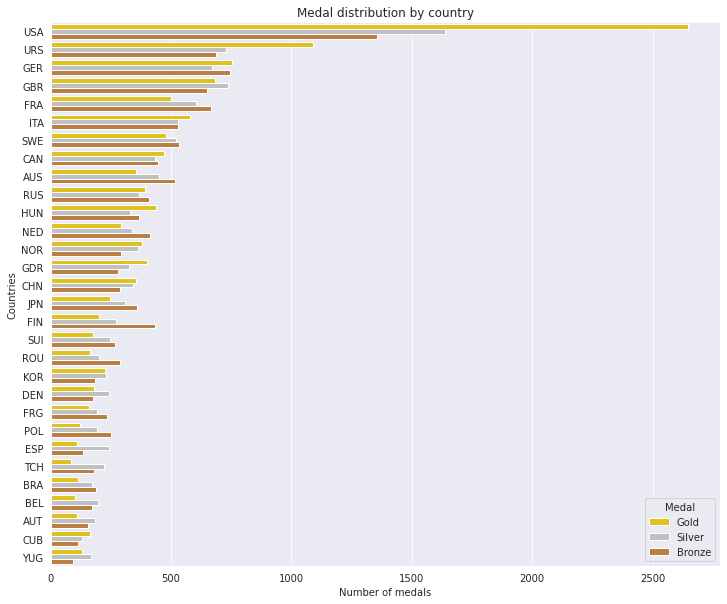

In [64]:
medals = df[df['Medal'] != 'NA']

plt.figure(figsize = (12,10))
sns.countplot(y = "NOC", hue = "Medal", data = medals, order = medals["NOC"].value_counts().index, hue_order = medals_order, palette = medals_colors)
plt.xlabel("Number of medals")
plt.ylabel("Countries")
plt.title("Medal distribution by country")
plt.ylim(29.5)
plt.show()

Com esse gráfico, percebemos que o país com mais medalhas é o estadunidense, que também possui a maior quantidade de cada tipo de medalha.

No entanto, outra questão que surge é: a distribuição de medalhas entre os maiores países se dá da mesma forma para ambos os sexos? Podemos ver isso no gráfico a seguir:

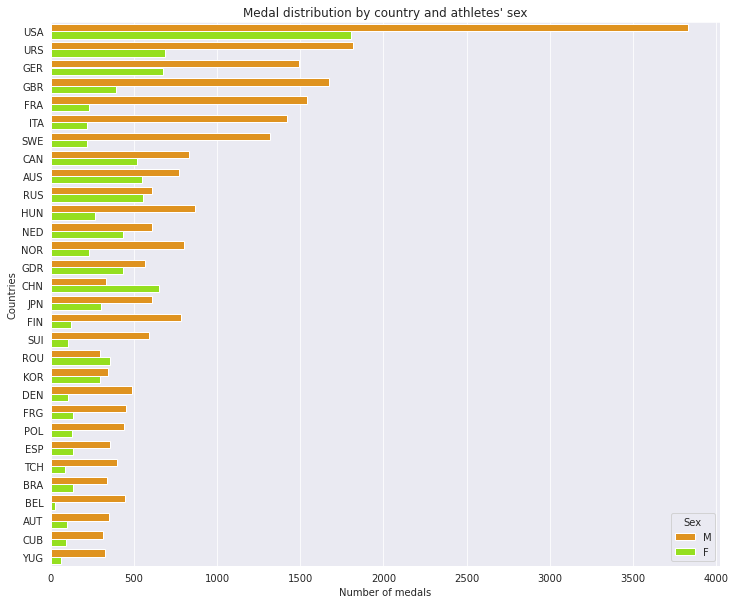

In [65]:
plt.figure(figsize = (12,10))
sns.countplot(y = "NOC", hue = "Sex", data = medals, order = medals["NOC"].value_counts().index)
plt.xlabel("Number of medals")
plt.ylabel("Countries")
plt.title("Medal distribution by country and athletes' sex")
plt.ylim(29.5)
plt.show()

Com isso, percebemos que os USA ainda são o maior país medalhista tanto para o sexo masculino, quanto para o feminino. No entanto, algumas nações que são grandes medalhistas, como França, Itália e Suécia, ainda apresentam poucas mulheres medalhistas, acarretando, portanto, uma grande concentração de medalhas dos países em mãos masculinas. Em outra análise, podemos ver que a China e a Romênia, dentre os Top 30 países medalhistas, são as únicas que possuem mais medalhistas mulheres do que homens.

## 5.6 Relação entre esportes e anos

Outra análise interessante que podemos fazer diz respeito ao fato da distribuição dos esportes ao longo dos anos. As Olimpíadas apresentam um caráter mutável em relação aos esportes que apresentam: em alguns anos, esportes surgem, enquanto, em outros, esportes deixam de ser competidos. 

Podemos ver essas relações no gráfico a seguir:

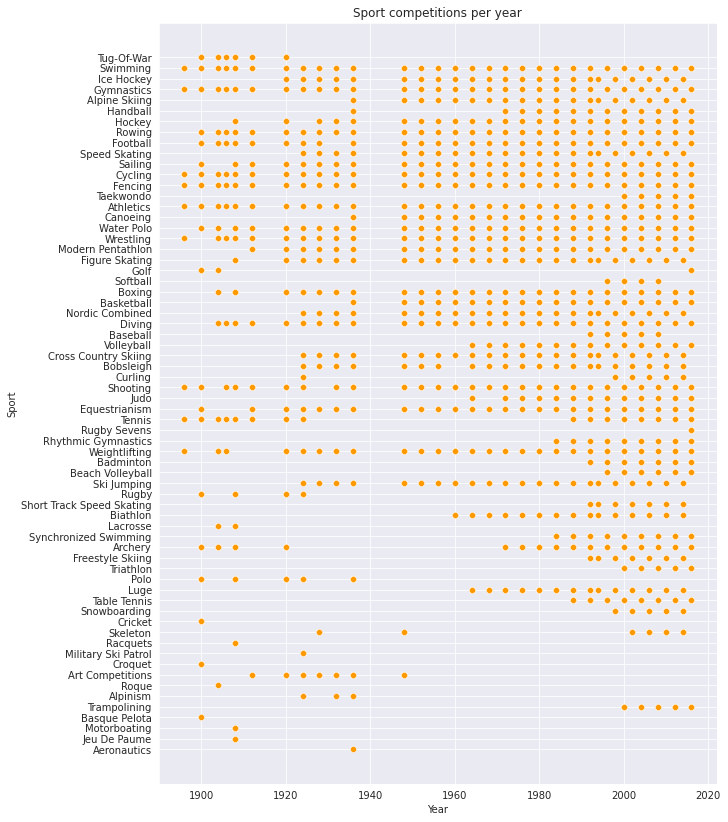

In [66]:
plt.figure(figsize = (10,14))
sns.scatterplot(x = "Year", y = "Sport",  data = medals)
plt.xlabel("Year")
plt.ylabel("Sport")
plt.title("Sport competitions per year")
plt.show()

Com essa análise, podemos ver que:
* Alguns esportes deixaram de ser praticados nas olimpíadas ao longo dos anos, como "Tug-of-War" e "Croquet". 
* Também existem esportes que foram praticados há muito tempo, mas deixaram de ser praticados e voltaram recentemente, como "Golf", que foi praticado em 1900,1904 e retornou em 2016. 
* Existem esportes recentes, como "Rugby Sevens", que surgiu em 2016. 
* Além disso, nos anos atuais, a diversidade de esportes é maior. 

## 5.7 Maiores medalhistas

Talvez a maior que questão que seja levantada ao trabalharmos um dataset de atletas seja quais são os maiores medalhistas. 

Como o nosso dataset apresenta muitos dados, é prático que criemos um novo dataset que apresente só os atletas que desejamos apresentar no gráfico e, em seguida, apresentemos o gráfico (caso contrário, a leitura dos gráficos seria mais demorada), o que pode ser visto a seguir:

In [67]:
medals.reset_index(inplace = True, drop = True) #Resetando o index devido aos valores faltantes após a limpeza
greatest_medalists = medals.groupby("Name").count().sort_values(by = ["Medal"], ascending = False).head(30) #Agrupando os 30 maiores medalhistas em outro dataset com suas quantidade de ocorrências

dfNew = pd.DataFrame()
for i in greatest_medalists.index:
  for j in medals["Name"].index:
    if i == medals["Name"][j]: #Procurando os maiores medalhistas do novo dataset no dataset medals, para que seus dados sejam adicionados
      dfNew = dfNew.append(medals.iloc[j], ignore_index=True) #Adicionando o medalhista e seus dados ao novo dataset

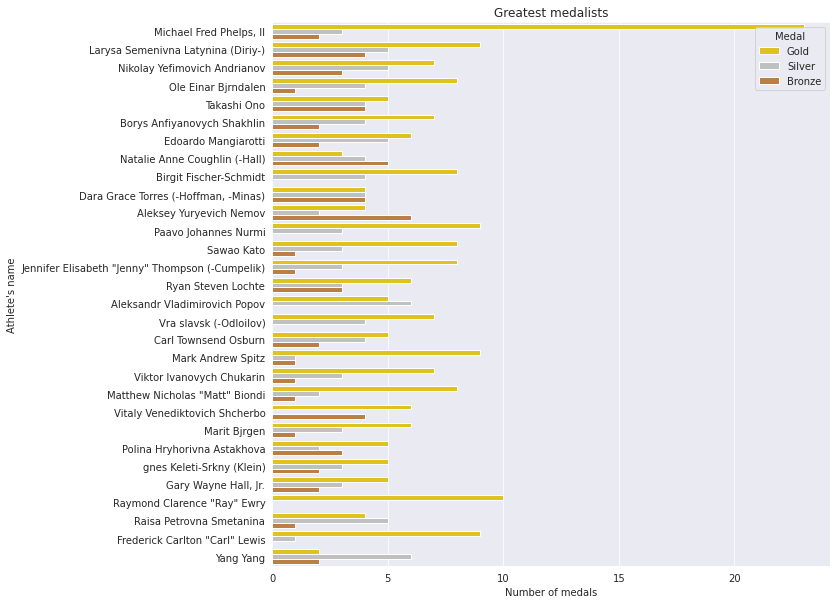

In [68]:
plt.figure(figsize = (10,10))
sns.countplot(y = "Name", hue = "Medal", data = dfNew,  hue_order = medals_order, palette = medals_colors)
plt.xlabel("Number of medals")
plt.ylabel("Athlete's name")
plt.title("Greatest medalists")
plt.show()

Com isso, percebemos que o atleta com o maior número de medalhas é "Michael Fred Phelps, II", o qual também apresenta o maior número de medalhas de ouro. 

## 5.8 Relação entre cidade e medalhistas

Outra análise que podemos fazer diz respeito à quantidade de medalhas concedida em cada cidade, o que pode ser visto a seguir:

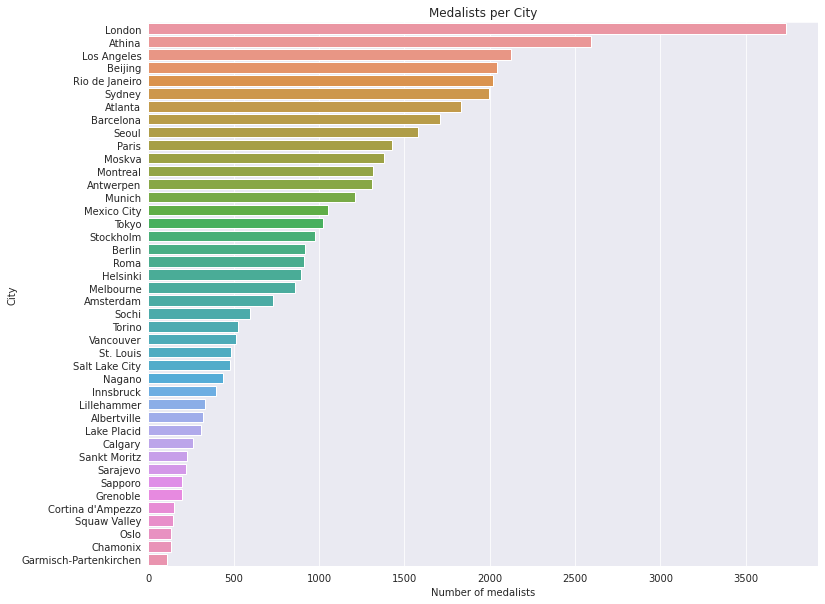

In [69]:
plt.figure(figsize = (12,10))
sns.countplot(y = "City", data = medals, order = medals["City"].value_counts().index)
plt.ylabel("City")
plt.xlabel("Number of medalists")
plt.title("Medalists per City")
plt.show()

Podemos ver que Londres é a cidade que mais concedeu medalhas, haja visto que já sediou os Jogos Olímpicos em três edições.

## 5.9 Relação entre países e anos

Outra análise que podemos fazer diz respeito a quantos países concorreram às medalhas em cada edição dos Jogos Olímpicos. Para isso, podemos, inicialmente, criar um dataset com uma ocorrência de cada país por ano e, em seguida, podemos montar o gráfico:

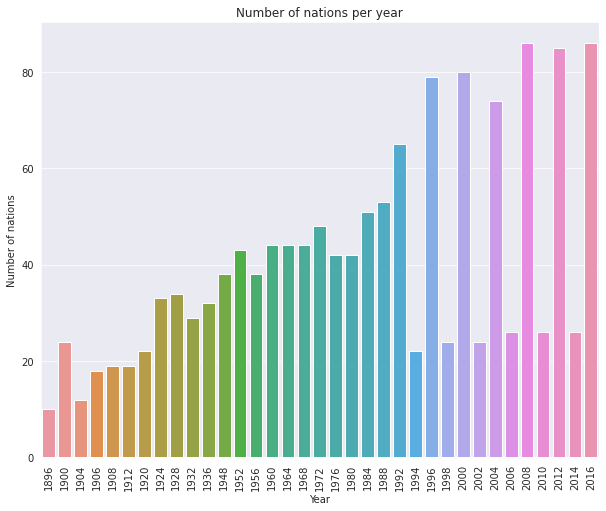

In [70]:
#Definindo um dataset em que apareça apenas uma ocorrência do país por ano
nations = medals.drop_duplicates(subset = ["NOC", "Year"])

#Plotando o gráfico
plt.figure(figsize = (10,8))
sns.countplot(x = "Year", data = nations)
plt.xticks(rotation = 90)
plt.ylabel("Number of nations")
plt.xlabel("Year")
plt.title("Number of nations per year")
plt.show()

Com isso, podemos verificar que a tendência é que o número de países competindo aumente a cada ano. Desde que os Jogos de Inverno passaram a ser realizados separadamente dos de Verão, há a interpolação entre valores altos e baixos, o que confere outra conclusão: há mais países, atualmente, disputando nas modalidades de Verão.

## 5.10 Relação entre categorias esportivas e anos

Também podemos verificar como se comportou o número de categorias esportivas ao longo dos anos:

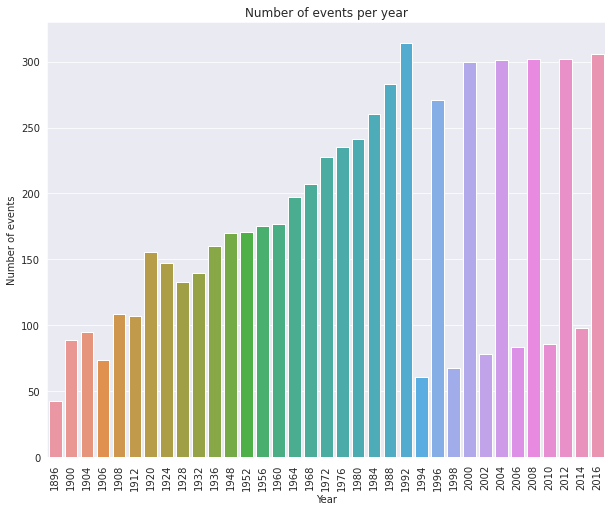

In [71]:
#Definindo um dataset em que apareça apenas uma ocorrência da categoria esportiva por ano
events = medals.drop_duplicates(subset = ["Event", "Year"])

#Plotando o gráfico
plt.figure(figsize = (10,8))
sns.countplot(x = "Year", data = events)
plt.xticks(rotation = 90)
plt.ylabel("Number of events")
plt.xlabel("Year")
plt.title("Number of events per year")
plt.show()

Como já era possível de se esperar, o número aumentou, salvas as exceções dos Jogos de Inverno isolados. Isso pode ser visto já que, com o passar dos anos, os Jogos Olímpicos tornaram-se cada vez mais diversos: novas categorias de esportes já tradicionais surgiram e, principalmente, categorias femininas foram implantadas.

## 5.11 Relação entre países e times

Por fim, podemos ver quais sãos as nações que possuem mais times representantes:

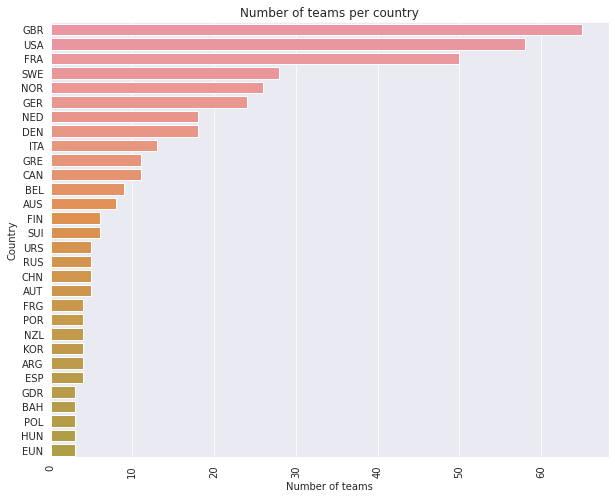

In [72]:
#Definindo um dataset em que apareça apenas uma vez o time por país
teams = medals.drop_duplicates(subset = ["Team", "NOC"])

#Plotando o gráfico:
plt.figure(figsize = (10,8))
sns.countplot(y = "NOC", data = teams, order = teams["NOC"].value_counts().index)
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.xlabel("Number of teams")
plt.title("Number of teams per country")
plt.ylim(29.5)
plt.show()

Percebemos que a nação com o maior número de times a representando é a Grã-Bretanha. Um fator que pode explicar isso é o fato de que "GBR" não identifica um país, mas sim um conjunto de países que, para fíns Olímpicos, vestem o mesmo uniforme, como Escócia, Inglaterra e País de Gales. Apesar disso, para algumas categorias, os países se separam do time "Grã-Bretanha", enquanto, para outras, mantém-se no mesmo time, o que, no dataset, contabiliza uma grande variação de times para a "nação".

# 6. Conclusão

Convergindo a análise que fizemos ao longo do notebook, podemos chegar a alguns pontos mais relevantes:
* Em valores absolutos, a quantidade de homens é superior a de mulheres; no entanto, com o passar dos anos, tal situação vem se equiparando;
* Edições olímpicas de verão possuem uma diversidade maior de esportes do que as de verão e, consquentemente, possuem mais medalhistas;
* A faixa etária de maior concentração dos homens, ao longo dos anos, nas Olimpíadas, tem diminuído, enquanto a das mulheres aumentado;
* O país com mais medalhas é o estadunidense;
* Os países com mais medalhas apresentam uma concentração grande delas em mãos de homens, o que difere apenas para a China e Romênia, que possuem mais medalhistas mulheres;
* Altura e peso estão diretamente ligados ao esporte dos atletas;
* A maior faixa etária média é para o esporte "Roque", enquanto a menor é para Ginástica Rítmica;
* Ao longo dos anos, esportes surgiram, deixaram de ser praticados, ou deixaram e voltaram a ser praticados nas Olimpíadas;
* O maior medalhista é Michael Fred Phelps, II;
* A cidade que mais concedeu medalhas foi Londres; 
* O número de países competindo aumentou ao longo dos anos, com excessão das versões isoladas dos Jogos de Inverno; o mesmo aconteceu com o número de eventos ao longo dos anos.
* A "nação" com mais times representantes é a Grã-Bretanha.